In [134]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
import joblib
import warnings
warnings.filterwarnings('ignore')


In [135]:
df=pd.read_csv('winequality-red.csv')

In [136]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [137]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [138]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [139]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No null values

Need to understand the value of count in quality and sort them into good bad or fine. we can do it on the later part.

In [140]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [141]:
bins=[0,5.5,7.5,10]  ## meaning this will be the limt, 0-5 low, 6-7 fine and above 8, good.

labels=['Bad','Fine','Good']

df['quality']=pd.cut(df['quality'],bins=bins,labels=labels)

In [142]:
## Encoding Bad, Fine and good to 0, 1, 2
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['quality']=le.fit_transform(df['quality'])

In [143]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [144]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int32
dtype: object

<AxesSubplot:>

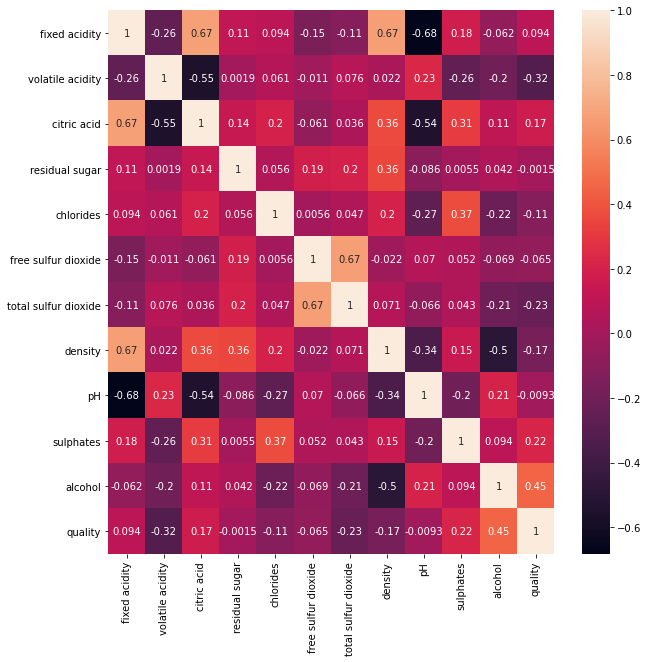

In [145]:
corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)

In [146]:
df.keys()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Compare details of each column

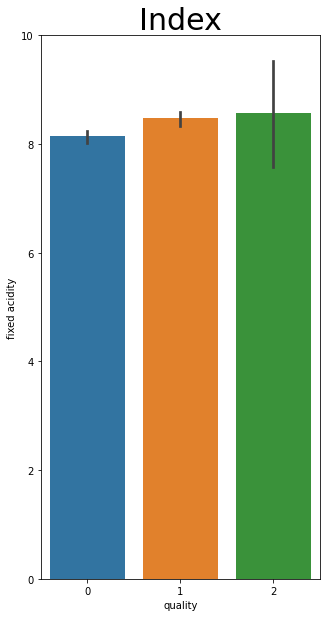

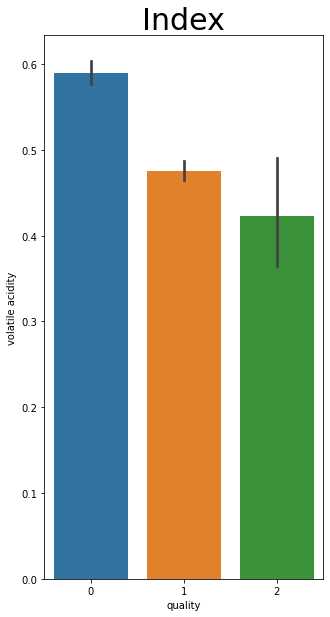

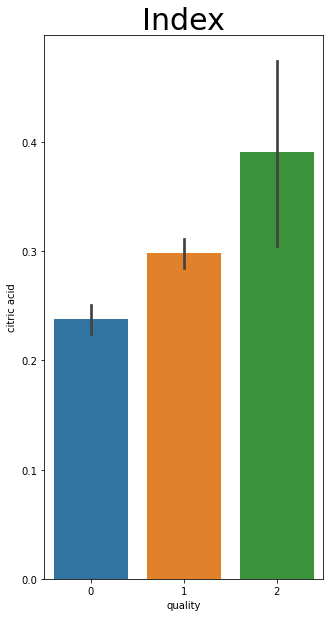

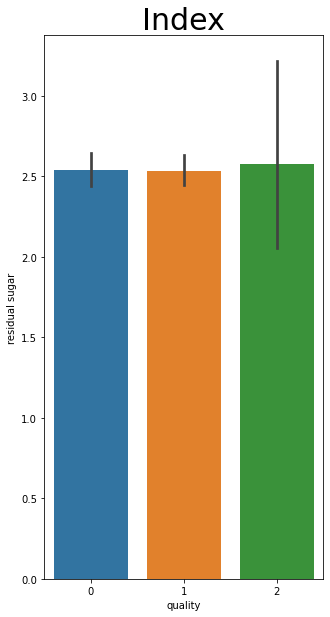

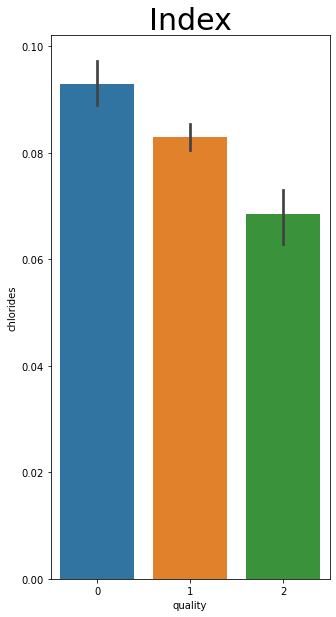

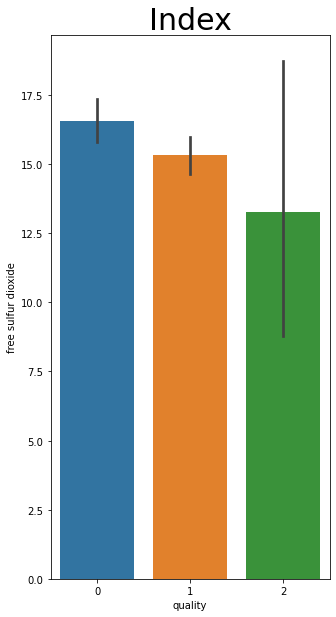

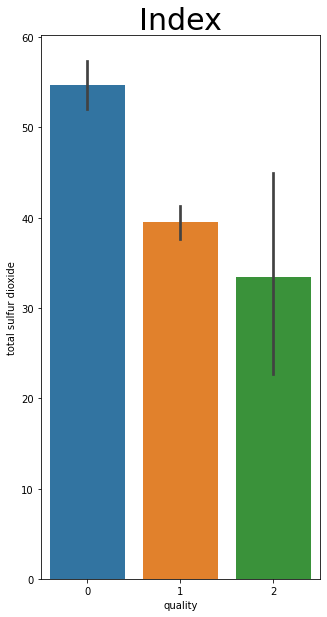

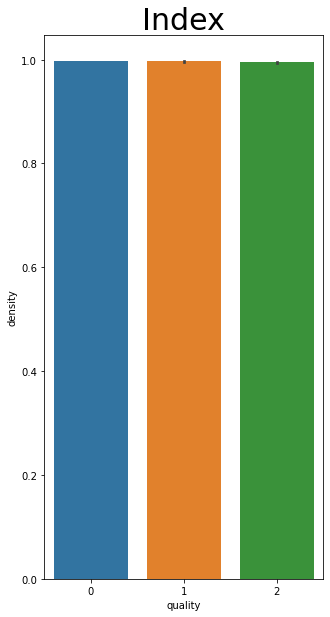

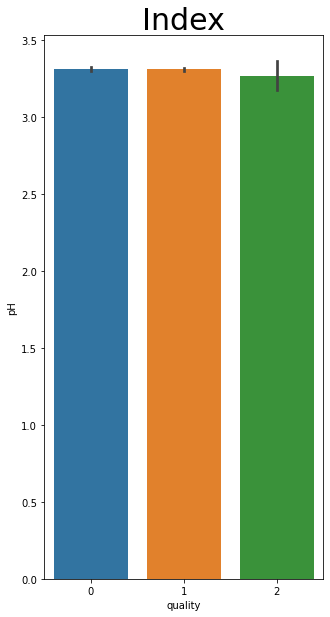

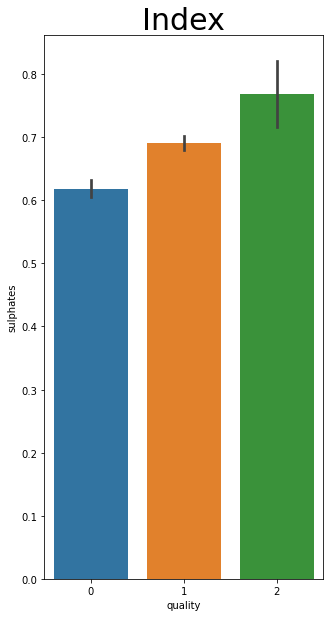

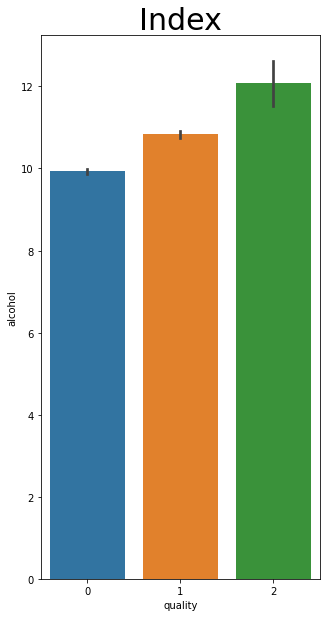

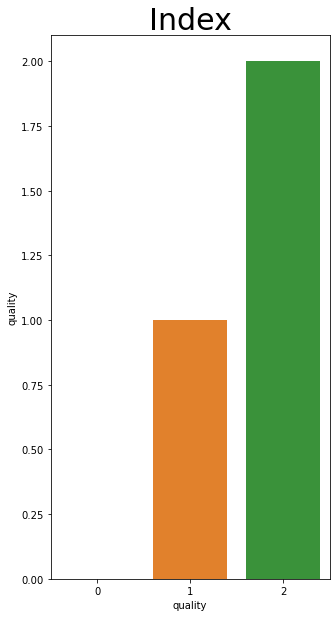

In [147]:
col = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

for i in col:
    plt.figure(figsize=(5,10))
    plt.title('Index',fontsize=30)
    sns.barplot(x='quality',y=i,data=df)
    plt.show()

1. With increment in colatile acidity, the wine is bad.
2. With increment in citric acid, the wine quality is good.
3. With increment in residual sugar, the wine quality is good.
4. With increment in Chlorides, the wine quality is bad.
5. With increment in free sulphur oxide, the wine quality is good.
6. With increment in total sulfur dioxide, the wine quality is bad.
7. With increment in density, the wine quality is good.
8. With increment in density, the wine quality is fine.
9. With increment in ph, the wine quality is good.
10. With increment in sulphates, the wine quality is good.
11. With increment in alchol, the wine quality is good.

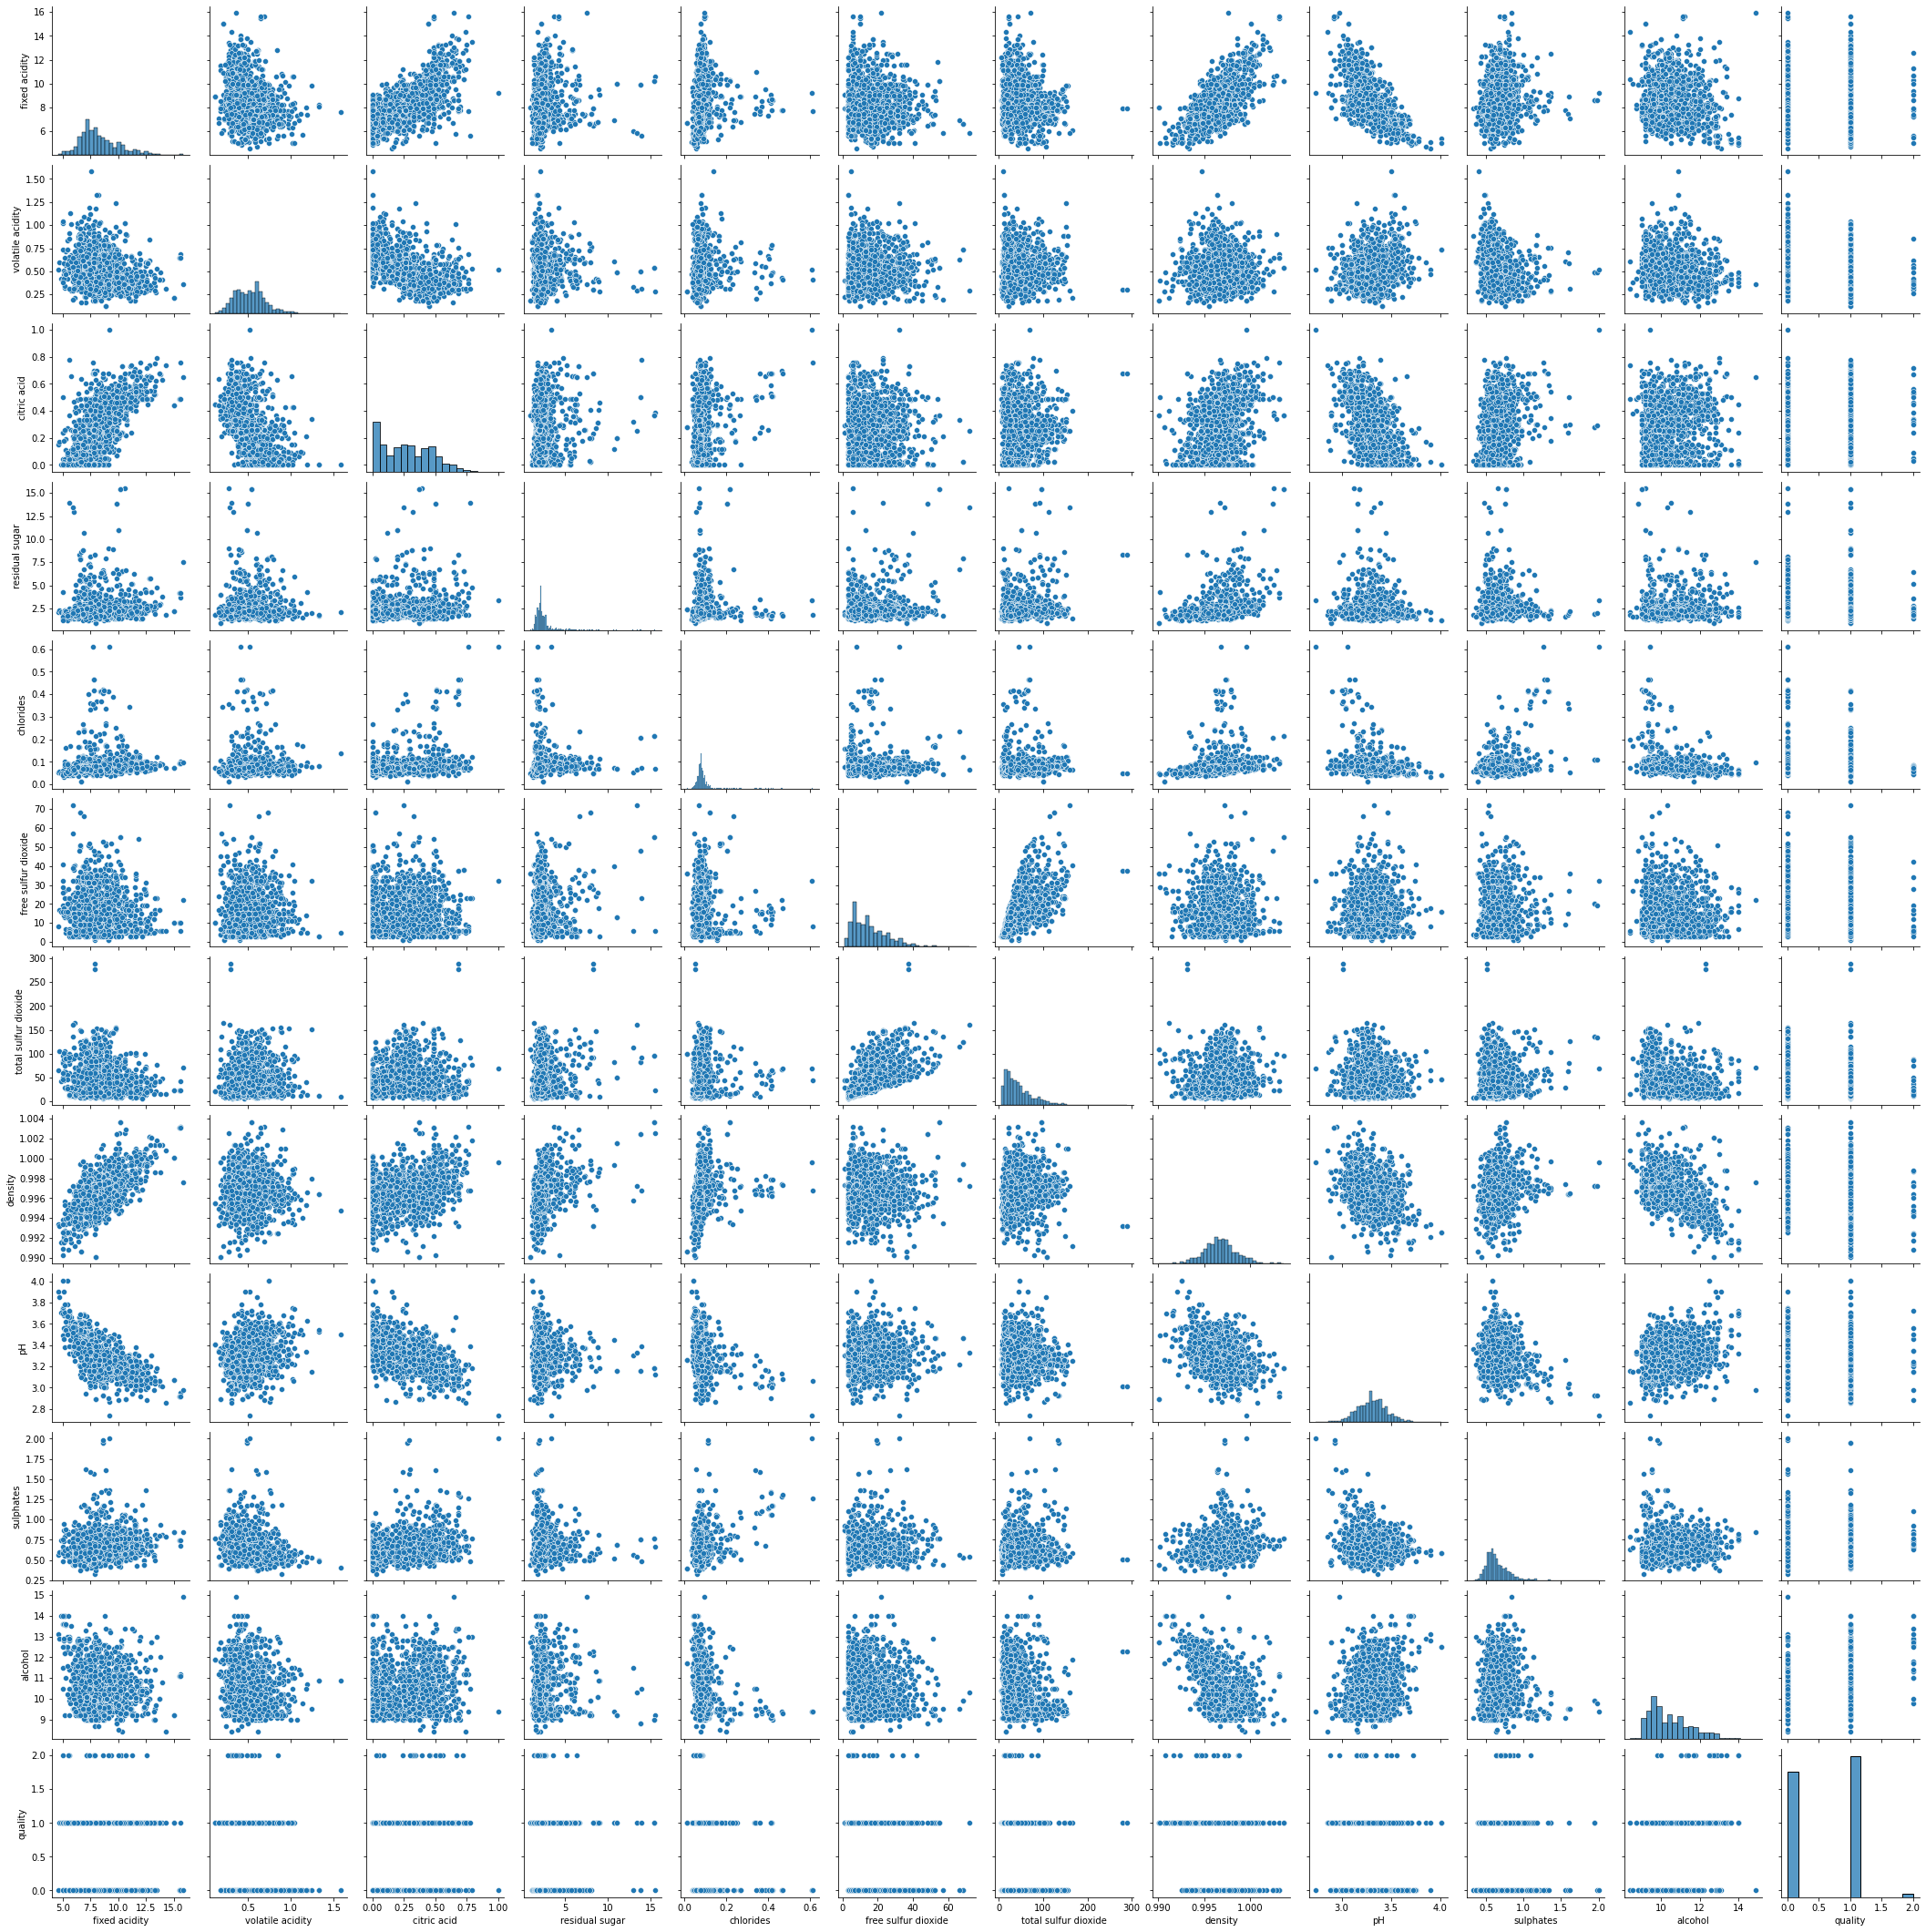

In [148]:
sns.pairplot(df)

In [149]:
from scipy.stats import zscore
zscr = np.abs(zscore(df))
threshold = 3
print(np.where(zscr>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        467,  480,  480,  494,  515,  544,  554,  554,  555,  555,  557,
        557,  568,  584,  588,  591,  595,  608,  614,  636,  639,  649,
        649,  651,  652,  652,  652,  672,  672,  684,  690,  692,  692,
        695,  723,  724,  730,  754,  776,  777,  795,  821,  836,  837,
        889,  911,  917,  923,  925,  926,  982, 1017, 1018, 1043, 1051,
       1051, 1071, 1074, 1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154,
       1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269,
       1270, 1270, 1288, 1289, 1295, 1296, 1299, 1

In [150]:
print('Shape before removing the outliers: ', df.shape)
dfnew = df[(zscr<3).all(axis = 1)]

print('Shape after removing the outliers: ', dfnew.shape)
#We see here 36 rows have been dropped

Shape before removing the outliers:  (1599, 12)
Shape after removing the outliers:  (1458, 12)


In [151]:
## Cheking the skewness in data:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.056077
dtype: float64

In [152]:
df=dfnew

In [153]:
df_x = df.drop(columns = ['quality'])
y = df[['quality']]


In [154]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [155]:
y

,quality
0,0
1,0
2,0
3,1
4,0
...,...
1594,0
1595,1
1596,1
1597,0


In [156]:
for i in df_x.columns:
    if df_x[i].skew()>0.5:
        df_x[i] = np.cbrt(df_x[i])
    if df_x[i].skew()<-0.5:
        df_x[i] = np.cbrt(df_x[i])
df_x.skew()

fixed acidity           0.527560
volatile acidity        0.392097
citric acid             0.292600
residual sugar          1.629756
chlorides               1.056128
free sulfur dioxide     0.127793
total sulfur dioxide    0.343010
density                 0.055543
pH                      0.113039
sulphates               0.526494
alcohol                 0.643830
dtype: float64

skewness is almost removed.

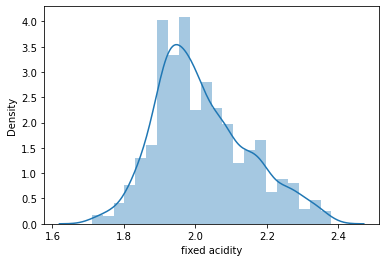

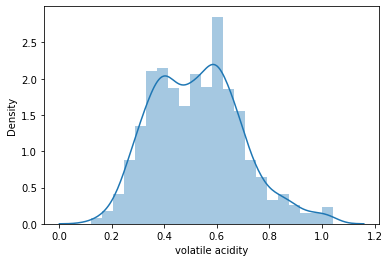

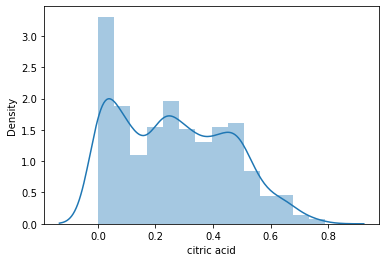

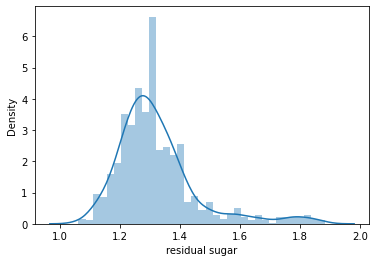

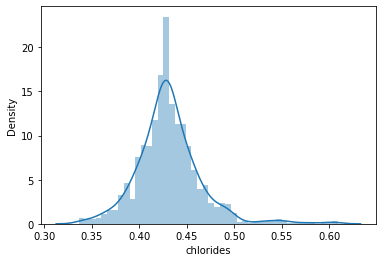

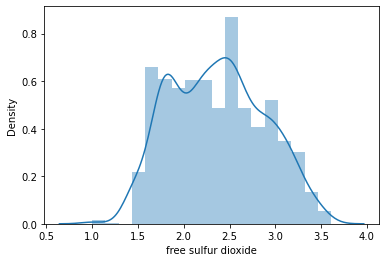

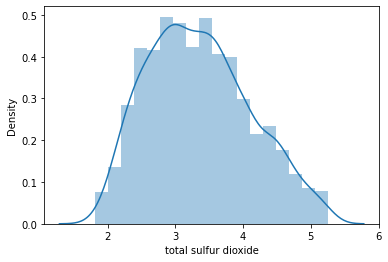

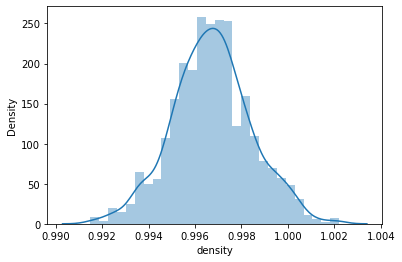

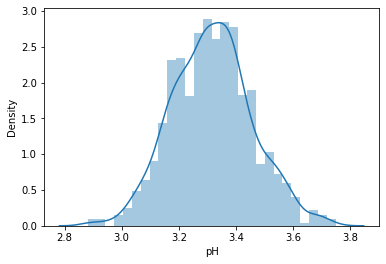

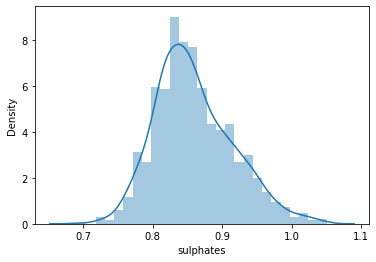

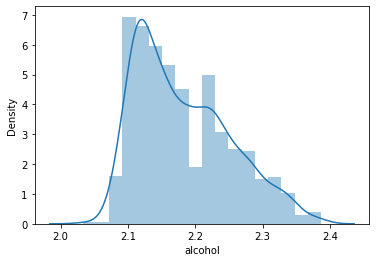

In [157]:
columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
for i in df_x[columns]:
    plt.figure()
    sns.distplot(df_x[i])

There is not much variance and kewness left here.

## Modelling

In [158]:
df_x.shape

(1458, 11)

In [159]:
y.shape

(1458, 1)

In [162]:
x_train,x_test,y_train,y_test=train_test_split(df_x , y , test_size=.33, random_state=33)

In [163]:
x_train.shape

(976, 11)

In [164]:
y_train.shape

(976, 1)

In [165]:
x_test.shape

(482, 11)

In [166]:
y_test.shape

(482, 1)

In [178]:
from sklearn.naive_bayes import MultinomialNB

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
model=[LogisticRegression(), MultinomialNB(), SVC(), DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier()]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy of ",m,"is :")
    print(accuracy_score(y_test,predm))
    print('Confusion :',confusion_matrix(y_test,predm))
    print('Classification report :',classification_report(y_test,predm))
    print('\n')
    score=cross_val_score(m,df_x,y,cv=5,scoring='f1_micro')
    print('Cross val score accuracy is \n',score)
    print('Mean \n', score.mean())
    print('Std \n',score.std())
    y_pred=cross_val_predict(m,df_x,y,cv=5)
    print('y prediction \n',y_pred)

    

Accuracy of  LogisticRegression() is :
0.7261410788381742
Confusion : [[145  72   0]
 [ 55 205   0]
 [  0   5   0]]
Classification report :               precision    recall  f1-score   support

           0       0.72      0.67      0.70       217
           1       0.73      0.79      0.76       260
           2       0.00      0.00      0.00         5

    accuracy                           0.73       482
   macro avg       0.48      0.49      0.48       482
weighted avg       0.72      0.73      0.72       482



Cross val score accuracy is 
 [0.67808219 0.69520548 0.78767123 0.70446735 0.70103093]
Mean 
 0.7132914371793062
Std 
 0.038281408988216234
y prediction 
 [0 0 0 ... 1 1 1]
Accuracy of  MultinomialNB() is :
0.5892116182572614
Confusion : [[ 43 174   0]
 [ 19 241   0]
 [  0   5   0]]
Classification report :               precision    recall  f1-score   support

           0       0.69      0.20      0.31       217
           1       0.57      0.93      0.71       260
      

Looking at the cross val score we got to know that in this model, Lg is working perfectly,so we will go ahead with Logistic regression as the only place where the normal accuracy is high is in random forest, but in that cross val score is having huge difference meaning there is variance hence we will proceed with Logistic Regression.

In [180]:
## creating linear regression model:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
pred=lr.predict(x_test)
print('Accuracy score: ',accuracy_score(y_test,pred))
print('Confusion matrix: ',confusion_matrix(y_test,pred))
print('Classification report: ',classification_report(y_test,pred))


Accuracy score:  0.7261410788381742
Confusion matrix:  [[145  72   0]
 [ 55 205   0]
 [  0   5   0]]
Classification report:                precision    recall  f1-score   support

           0       0.72      0.67      0.70       217
           1       0.73      0.79      0.76       260
           2       0.00      0.00      0.00         5

    accuracy                           0.73       482
   macro avg       0.48      0.49      0.48       482
weighted avg       0.72      0.73      0.72       482



as we alerady know that there is not much difference in the accuracy score after cross val hence we will load this model ass final output.

In [181]:
joblib.dump(lr, 'lrmodelwine.obj')

['lrmodelwine.obj']